# Plotting: multiple backend support
`PlotCollection` already uses elements from `xrtist.backend`, so it's existing limited features are completely interchangeable between both backends!

Here are some examples:

In [1]:
import bokeh.io
from bokeh.plotting import show


bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
import arviz as az
import numpy as np
import xarray as xr

from xrtist import PlotCollection, visuals

In [3]:
idata = az.load_arviz_data("rugby")
post = idata.posterior

## Basic example

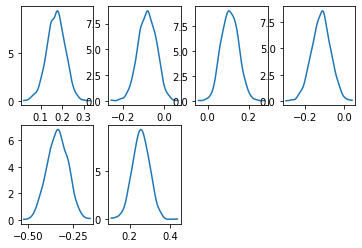

In [4]:
pc = PlotCollection.wrap(
    post["atts"], 
    cols=["team"], 
)
pc.map(visuals.kde, "kde")

In [5]:
pc = PlotCollection.wrap(
    post["atts"], 
    cols=["team"], 
    backend="bokeh",
    plot_grid_kws=dict(width=100, height=100)
)
pc.map(visuals.kde, "kde")
show(pc.viz["chart"].item())

## More extense example

In [6]:
color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

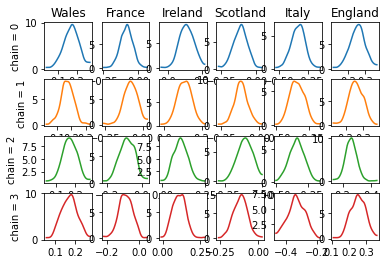

In [7]:
pc = PlotCollection.grid(
    post["atts"], 
    cols=["team"],
    rows=["chain"],
    aes={"color": ["chain"]}, 
    color=color_cycle,
    subplot_kws={"figsize": (12, 8)}
)
pc.map(visuals.kde, "kde")

# once we manually interact with the backend object, we need to adapt
for ax in pc.viz["plot"].sel(chain=0):
    ax.item().set_title(ax["team"].item())


for ax in pc.viz["plot"].isel(team=0):
    ax.item().set_ylabel(f"""chain = {ax["chain"].item()}""")

In [8]:
pc = PlotCollection.grid(
    post["atts"], 
    cols=["team"],
    rows=["chain"],
    aes={"color": ["chain"]}, 
    color=color_cycle,
    backend="bokeh",
    plot_grid_kws=dict(width=100, height=100)
)
pc.map(visuals.kde, "kde")

# once we manually interact with the backend object, we need to adapt
for ax in pc.viz["plot"].sel(chain=0):
    ax.item().title = ax["team"].item()


for ax in pc.viz["plot"].isel(team=0):
    ax.item().yaxis.axis_label = f"""chain = {ax["chain"].item()}"""
    
show(pc.viz["chart"].item())

## `plot_forest` mimic

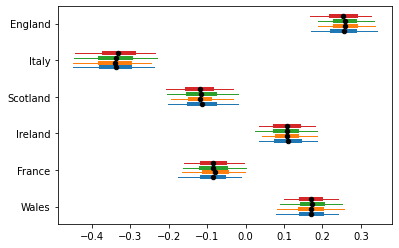

In [9]:
y = np.arange(6)[:, None] + np.linspace(-.2, .2, 4)[None, :]

pc = PlotCollection.wrap(
    post["atts"],
    aes={"color": ["chain"], "y": ["team", "chain"]},
    y=y.flatten(),
    color=color_cycle,
    subplot_kws={"figsize": (12, 8)}
)
pc.map(visuals.interval, "hdi", linewidth=1)
pc.map(
    visuals.interval, 
    "quartile_range", 
    linewidth=4, 
    interval_func=lambda values: np.quantile(values, (.25, .75))
)
pc.map(visuals.point, "mean", color="black", size=20, zorder=2)

# and here we adapt
pc.viz["plot"].item().set_yticks(np.arange(6), post["team"].values);

In [10]:
y = np.arange(6)[:, None] + np.linspace(-.2, .2, 4)[None, :]

pc = PlotCollection.wrap(
    post["atts"],
    aes={"color": ["chain"], "y": ["team", "chain"]},
    y=y.flatten(),
    color=color_cycle,
    backend="bokeh",
    plot_grid_kws={"subplot_kws": dict(width=600, height=400)}
)
pc.map(visuals.interval, "hdi", linewidth=1)
pc.map(
    visuals.interval, 
    "quartile_range", 
    linewidth=4, 
    interval_func=lambda values: np.quantile(values, (.25, .75))
)
pc.map(visuals.point, "mean", color="black", size=5)

##
yaxis = pc.viz["plot"].item().yaxis.major_label_overrides = {
    k: v for k, v in enumerate(post["team"].values)
}

show(pc.viz["plot"].item())